<a href="https://colab.research.google.com/github/eeqilim/lung-cancer-prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Application of Discrete Probability in Lung Cancer Prediction**

The project predicts lung cancer using machine learning models, specifically Gaussian Naive Bayes and Logistic Regression, along with a neural network using TensorFlow.

**NOTE:** Both TensorFlow and scikit-learn are used in this program. Scikit-learn is used for data preprocessing, splitting, training and evaluating the Gaussian Naive Bayes and Logistic Regression models. TensorFlow is used for building, training, and evaluating the neural network model.

**Here's a detailed explanation of the project:**

1. Data Cleaning and Preprocessing:
- The dataset is checked for duplicate rows using the drop_duplicates() method, and any duplicate data is eliminated from the DataFrame.
- The 'GENDER' and 'LUNG_CANCER' columns are converted to numeric values (0 and 1) using the pd.to_numeric() method.
- A new DataFrame called 'data_analysis_new' is created, where the 'GENDER' column is one-hot encoded using pd.get_dummies() method.
- Unnecessary columns are removed from the 'data_analysis_new' DataFrame to include only relevant features for the analysis.

2. Data Splitting and Standardization:
- The 'data_analysis' DataFrame is split into features (x) and target (y), where 'LUNG_CANCER' is the target variable.
- Features (x) are standardized using StandardScaler() from scikit-learn, which scales the features to have mean=0 and standard deviation=1.

3. Model Training and Evaluation:
- The standardized features and target are split into training and testing sets using train_test_split() from scikit-learn with a test size of 25%.
- A neural network model is defined using TensorFlow's Keras API. The model has an input layer with the number of features, a hidden layer with 64 units and ReLU activation, and an output layer with 1 unit and sigmoid activation for binary classification.
- The model is compiled with 'adam' optimizer and 'binary_crossentropy' loss function for binary classification.
- The model is trained on the training data using model.fit() with 10 epochs and batch size of 32. The training and validation accuracy and loss are monitored during training.
- The model is evaluated on the test data using model.evaluate(), and the test accuracy is printed.

4. Additional Models:
Gaussian Naive Bayes and Logistic Regression models are also trained and evaluated using the same training and testing sets.
The confusion matrices and classification reports are displayed for both models.

**Import Libraries and Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('survey lung cancer.csv')

**Overview of the data**

In [ ]:
dataset.shape # num of rows, num of columns

(309, 16)

In [ ]:
dataset.head() # Display first 5 of the dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dataset.info() # Summary of the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

**Data Cleaning**

In [ ]:
dataset = dataset.drop_duplicates() # Eliminate any duplicate data

In [ ]:
dataset.shape

(276, 16)

In [ ]:
dataset['GENDER'].replace('M', 1, inplace = True) # Convert the result from "GENDER" into value
dataset['GENDER'].replace('F', 2, inplace = True) # Convert the result from "GENDER" into value

dataset['LUNG_CANCER'].replace('YES', 2, inplace = True) # Convert the result from "LUNG_CANCER" into value
dataset['LUNG_CANCER'].replace('NO', 1, inplace = True) # Convert the result from "LUNG_CANCER" into value

In [ ]:
dataset.head() # Display first 5 of the dataset after data cleaning

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [ ]:
dataset.info() # Summary of dataframe after data cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [ ]:
dataset[["GENDER", "LUNG_CANCER"]] = dataset[["GENDER", "LUNG_CANCER"]].apply(pd.to_numeric)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [ ]:
dataset.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.485507,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,1.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.000000,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,2.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**Data Visualization**

In [ ]:
import seaborn as sns

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

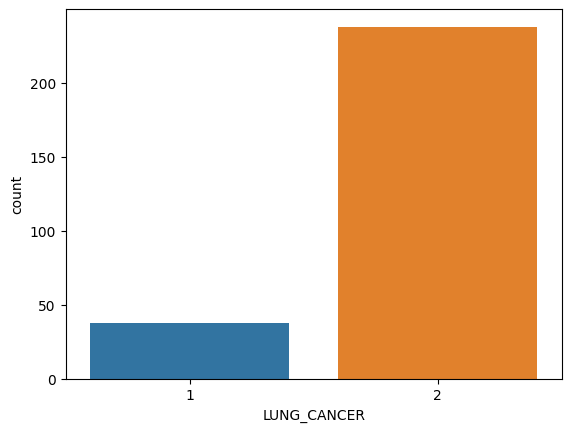

In [ ]:
sns.countplot(x ='LUNG_CANCER',data = dataset) # Count plot to check wheather or not the dataset is balanced

**NOTE:** Total count of participants who do not have lung cancer is far less than participants who do have have lung cancer, which indicates that the data is imbalanced.

In [ ]:
data_analysis = dataset.copy()    # copy of data for analysis
data_analysis.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
5,2,75,1,2,1,1,2,2,2,2,1,2,2,1,1,2
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,2
7,2,51,2,2,2,2,1,2,2,1,1,1,2,2,1,2
8,2,68,2,1,2,1,1,2,1,1,1,1,1,1,1,1
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,2


# Scikit-learn

**NOTE:** Scikit-learn, often referred to as sklearn, is a popular open-source machine learning library for Python.

**Here are some key functionalities and features of scikit-learn:**

1. Machine Learning Algorithms: Scikit-learn offers a comprehensive suite of machine learning algorithms, including supervised learning (e.g., regression, classification), unsupervised learning (e.g., clustering, dimensionality reduction), and semi-supervised learning.
2. Data Preprocessing: It provides various data preprocessing techniques, such as feature scaling, data normalization, imputation of missing values, and encoding categorical variables.
3. Model Selection and Evaluation: Scikit-learn provides tools for model selection, including data splitting for training and testing, cross-validation, and hyperparameter tuning. It also offers metrics for evaluating model performance, such as accuracy, precision, recall, F1-score, and more.
4. Feature Selection: Sklearn provides methods for feature selection, allowing you to choose the most relevant features for your model and eliminate irrelevant or redundant ones.
5. Pipeline Building: It enables the creation of data processing pipelines, where data goes through a sequence of transformations before being fed into a machine learning model. This simplifies the process of building complex workflows.
6. Integration with NumPy and Pandas: Sklearn seamlessly integrates with NumPy and Pandas, making it easy to work with data in these formats.
7. Ensemble Methods: It includes ensemble methods such as random forests, gradient boosting, and voting classifiers, which combine multiple models to improve overall predictive performance.
8. Support for Various Data Types: Sklearn can handle both dense and sparse data arrays, making it suitable for working with a wide range of data types.

In [ ]:
from sklearn.preprocessing import LabelEncoder


# data_analysis was a copy of the data after the duplicate were removed

data_analysis["LUNG_CANCER"] = data_analysis["LUNG_CANCER"].replace({"YES": 1, "NO": 0})

data_analysis_new = pd.get_dummies(data_analysis, columns=["GENDER"])


data_analysis_new.rename(columns={"GENDER_1": "MALE", "GENDER_2": "FEMALE"}, inplace=True)
data_analysis_new = data_analysis_new[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER_PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW_FINGERS","ANXIETY","FATIGUE ","ALLERGY ","WHEEZING","LUNG_CANCER"]]
data_analysis_new.head()



,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER_PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG_CANCER
0,69,1,0,2,2,2,2,1,1,2,2,2,2,1,2,2
1,74,1,0,1,2,2,1,1,2,2,1,1,2,2,1,2
2,59,0,1,1,2,2,2,2,1,1,1,1,2,1,2,1
3,63,1,0,2,2,1,1,1,1,2,2,2,1,1,1,1
4,63,0,1,1,1,2,2,1,1,1,2,1,1,1,2,1


**Split data and get ready for running different models**

In [ ]:
x = data_analysis.drop("LUNG_CANCER", axis=1)
y = data_analysis["LUNG_CANCER"]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)


xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

print(f"{xTrain.shape}, {yTrain.shape}")
print(f"{xTest.shape}, {yTest.shape}")

(207, 15), (207,)
(69, 15), (69,)


# TensorFlow

**NOTE:** TensorFlow can also be used for both supervised and unsupervised learning tasks. TensorFlow is a powerful and flexible deep learning framework that allows you to build and train various types of machine learning models, including those used in supervised and unsupervised learning.

**1. Supervised Learning:**
In supervised learning, the model is trained on labeled data, where the input features and corresponding target labels are provided. TensorFlow can be used to build and train various supervised learning models, such as:
- Regression Models: TensorFlow can be used to create regression models for predicting continuous numeric values. For example, you can build a linear regression model, a neural network for regression, or more complex models for regression tasks.
- Classification Models: TensorFlow is commonly used for building classification models for predicting discrete classes or labels. You can create neural networks, convolutional neural networks (CNNs), recurrent neural networks (RNNs), and other types of classifiers for tasks like image classification, sentiment analysis, and more.

**2. Unsupervised Learning:**
In unsupervised learning, the model is trained on unlabeled data, and it aims to find patterns, structure, or representations within the data. TensorFlow can be used for various unsupervised learning tasks, such as:
- Clustering: TensorFlow can be used to build clustering models, such as K-means clustering or hierarchical clustering, to group similar data points together based on their features.
- Autoencoders: Autoencoders are a type of neural network used for dimensionality reduction and feature learning. They are commonly used in unsupervised learning to learn a compressed representation of the input data.
- Generative Models: TensorFlow can be used to build generative models like Generative Adversarial Networks (GANs) and Variational Autoencoders (VAEs) for generating new data that resembles the training data.

In [ ]:
import tensorflow as tf

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x.shape[1],)),  # Input layer with the number of features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xTrain, yTrain, batch_size=32, epochs=10, validation_data=(xTest, yTest))

# Evaluate the model
loss, accuracy = model.evaluate(xTest, yTest)
print(f'Test accuracy: {accuracy}')

# Make predictions
yPred = model.predict(xTest)

Epoch 1/10
7/7 [==============================] - 4s 187ms/step - loss: 0.3530 - accuracy: 0.0531 - val_loss: 0.1523 - val_accuracy: 0.1014
Epoch 2/10
7/7 [==============================] - 0s 20ms/step - loss: 0.0615 - accuracy: 0.0966 - val_loss: -0.1037 - val_accuracy: 0.1304
Epoch 3/10
7/7 [==============================] - 0s 22ms/step - loss: -0.2129 - accuracy: 0.1111 - val_loss: -0.3489 - val_accuracy: 0.1884
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: -0.4728 - accuracy: 0.1208 - val_loss: -0.5843 - val_accuracy: 0.1884
Epoch 5/10
7/7 [==============================] - 0s 18ms/step - loss: -0.7281 - accuracy: 0.1208 - val_loss: -0.8083 - val_accuracy: 0.1884
Epoch 6/10
7/7 [==============================] - 0s 26ms/step - loss: -0.9708 - accuracy: 0.1208 - val_loss: -1.0271 - val_accuracy: 0.1884
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: -1.2098 - accuracy: 0.1208 - val_loss: -1.2419 - val_accuracy: 0.1884
Epoch 8/10
7/7 

**NOTE:** The output shows the training and evaluation process of a neural network model using TensorFlow with 10 epochs. Each epoch represents one complete pass through the entire training dataset. The model is evaluated on a validation dataset after each epoch to monitor its performance.

**Let's break down the output:**

1. Epochs and Batches: Each epoch consists of a certain number of batches. In this case, it seems that each epoch has 7 batches.
2. Training Progress: For each epoch, you can see the training loss and accuracy. The training loss is a measure of how well the model is performing on the training data, and the training accuracy indicates the percentage of correct predictions on the training data.
3. Validation Progress: After each epoch, the model is evaluated on the validation data (i.e., the test set). You can see the validation loss and validation accuracy for each epoch. The validation loss and accuracy show how well the model generalizes to unseen data (test data).
4. Test Accuracy: After training the model for 10 epochs, it is evaluated on the test data (which was not used during training). The test accuracy is calculated to determine the model's final performance on unseen data. In this case, the test accuracy is 0.1884, indicating that the model's performance on unseen data is not very good.
5. Interpretation: The negative loss values during training and the low test accuracy suggest that there might be issues with the model's architecture, hyperparameters, or the quality of the data itself. It is important to analyze and debug the model to improve its performance.

**A test accuracy of 0.1884 indicates that the model's performance on unseen data is quite poor. There could be several reasons why the test accuracy is low:**

1. Insufficient Data: One common reason for low test accuracy is the lack of enough data for the model to learn meaningful patterns and make accurate predictions. Deep learning models, especially neural networks, require a significant amount of data to generalize well to unseen examples. If the dataset used for training is small, the model may not capture the underlying patterns effectively, leading to poor performance on the test set.
2. Overfitting: Overfitting occurs when the model learns to memorize the training data instead of learning general patterns. This can happen if the model is too complex relative to the available data or if the training process runs for too many epochs. As a result, the model performs well on the training data but fails to generalize to new, unseen data, resulting in low test accuracy.
3. Poor Model Architecture: The choice of model architecture (number of layers, number of nodes per layer, etc.) may not be suitable for the given problem. A model that is too simple may not capture complex patterns, while a model that is too complex may overfit. Selecting an appropriate model architecture is crucial for achieving good generalization.
4. Data Quality and Features: The quality of the data and the features used for training can significantly impact model performance. If the data is noisy or contains irrelevant features, the model may learn to focus on irrelevant information, leading to poor test accuracy.
5. Hyperparameter Tuning: Hyperparameters like learning rate, batch size, and regularization strength can affect model performance. If these hyperparameters are not properly tuned, the model may converge to suboptimal solutions, resulting in low test accuracy.
6. Data Imbalance: Class imbalances in the dataset, where one class is significantly more prevalent than the other, can also lead to biased model predictions. If the model is biased towards the majority class, it may perform poorly on the minority class, resulting in low overall accuracy.

# Gaussian Naive Bayes

Classification Report Naive Bayes with 75/25 data split: 

              precision    recall  f1-score   support

           1       0.90      0.69      0.78        13
           2       0.93      0.98      0.96        56

    accuracy                           0.93        69
   macro avg       0.92      0.84      0.87        69
weighted avg       0.93      0.93      0.92        69

The Accuracy of Gaussian Naive Bayes is 92.75 %



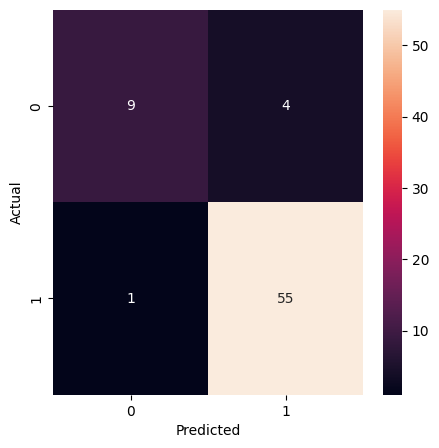

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 75/25 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

# Logistic Regression

Classification Report Logistic Regression (75/25 split): 

              precision    recall  f1-score   support

           1       1.00      0.54      0.70        13
           2       0.90      1.00      0.95        56

    accuracy                           0.91        69
   macro avg       0.95      0.77      0.82        69
weighted avg       0.92      0.91      0.90        69

The Accuracy of Logistic Regression is 91.3 %



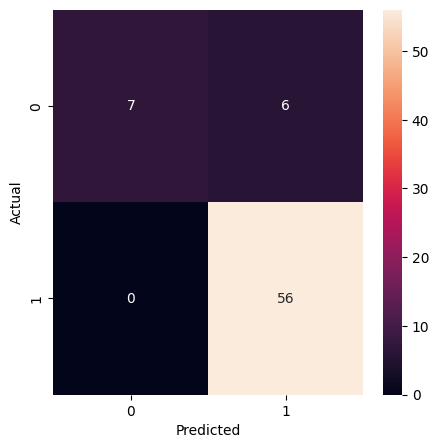

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (75/25 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")

All sort of accuracy, f1score...etc, see explaination here: https://towardsdatascience.com/the-f1-score-bec2bbc38aa6



Since the F1 score is an average of Precision and Recall, it means that the F1 score gives equal weight to Precision and Recall:

A model will obtain a high F1 score if both Precision and Recall are high
A model will obtain a low F1 score if both Precision and Recall are low
A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high

# Split data 80/20


Classification Report Naive Bayes with 80/20 data split: 

              precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56

The Accuracy of Gaussian Naive Bayes is 91.07 %



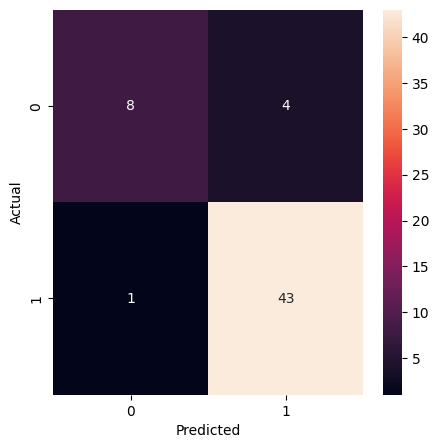

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.20, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 80/20 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

Classification Report Logistic Regression (80/20 split): 

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

The Accuracy of Logistic Regression is 92.86 %



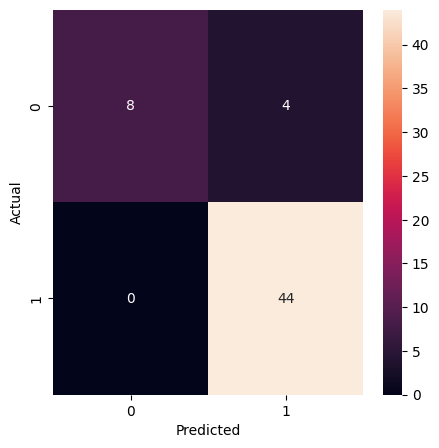

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (80/20 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")


# Split data 70/30

Classification Report Naive Bayes with 70/30 data split: 

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        13
           2       0.93      0.97      0.95        70

    accuracy                           0.92        83
   macro avg       0.87      0.79      0.82        83
weighted avg       0.91      0.92      0.91        83

The Accuracy of Gaussian Naive Bayes is 91.57 %



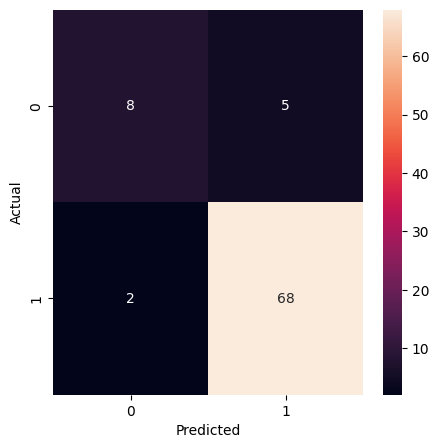

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 70/30 data split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

Classification Report Logistic Regression (70/30 split): 

              precision    recall  f1-score   support

           1       1.00      0.38      0.56        13
           2       0.90      1.00      0.95        70

    accuracy                           0.90        83
   macro avg       0.95      0.69      0.75        83
weighted avg       0.91      0.90      0.88        83

The Accuracy of Logistic Regression is 90.36 %



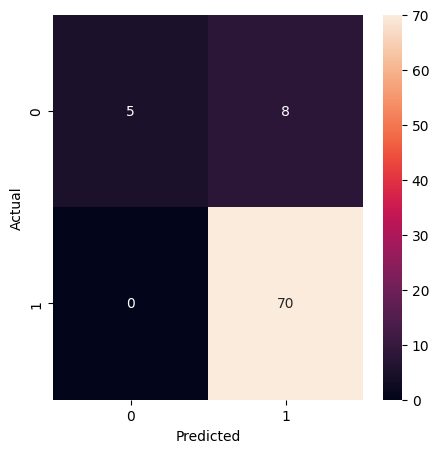

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (70/30 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")

# Split data 65/35


Classification Report Naive Bayes with 65/35 split: 

              precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.94      0.95      0.95        83

    accuracy                           0.91        97
   macro avg       0.82      0.80      0.81        97
weighted avg       0.90      0.91      0.91        97

The Accuracy of Gaussian Naive Bayes is 90.72 %



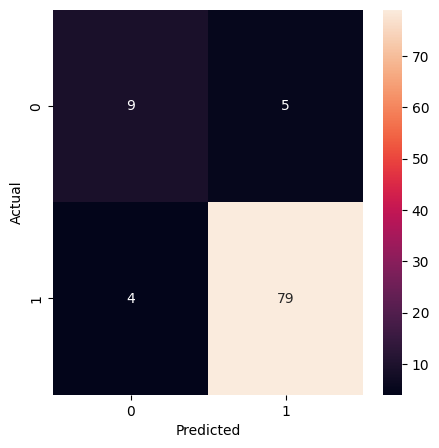

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.35, random_state=42)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(xTrain, yTrain)
gnbPredict = gaussianNaiveBayes.predict(xTest)
gnbConfusionMatrix = confusion_matrix(yTest, gnbPredict)
gnbReport = classification_report(yTest, gnbPredict)
gnbAccuracy = round(accuracy_score(yTest, gnbPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(gnbConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Naive Bayes with 65/35 split: \n\n{gnbReport}")
print(f"The Accuracy of Gaussian Naive Bayes is {gnbAccuracy} %\n")

Classification Report Logistic Regression (65/35 split): 

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.95      0.95      0.95        83

    accuracy                           0.92        97
   macro avg       0.83      0.83      0.83        97
weighted avg       0.92      0.92      0.92        97

The Accuracy of Logistic Regression is 91.75 %



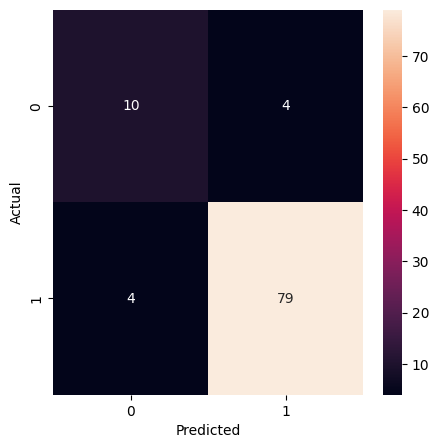

In [ ]:
logisticRegression = LogisticRegression()
logisticRegression.fit(xTrain, yTrain)
lrPredict = logisticRegression.predict(xTest)
lrConfusionMatrix = confusion_matrix(yTest, lrPredict)
lrReport = classification_report(yTest, lrPredict)
lrAccuracy = round(accuracy_score(yTest, lrPredict) * 100, ndigits=2)

plt.figure(figsize=(5, 5))
sns.heatmap(lrConfusionMatrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(f"Classification Report Logistic Regression (65/35 split): \n\n{lrReport}")
print(f"The Accuracy of Logistic Regression is {lrAccuracy} %\n")